In [1]:
!pip install --upgrade librosa

  Using cached numpy-1.21.6-cp310-cp310-win_amd64.whl (14.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.4
    Uninstalling numpy-1.23.4:
      Successfully uninstalled numpy-1.23.4


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fuzzy-c-means 1.6.4 requires pydantic<2.0.0,>=1.9.0, but you have pydantic 1.8.2 which is incompatible.


In [3]:
import librosa
import librosa.display
import numpy as np
import os
import statistics 

In [8]:
def batch(iterable, n):
    l = len(iterable)
    for ndx in range(0, l, n):
        yield iterable[ndx:min(ndx + n, l)]
def normal(stat, feature_matrix):
    return np.nan_to_num((feature_matrix - stat['mean']) / stat['std'])
def normal2(matrix):
    aux  = matrix.T
    print("Normalizing...")
    for idx in batch(np.arange(aux.shape[0]), 1000):
        aux[idx, :] = normal(stat , aux[idx, :])
    return aux

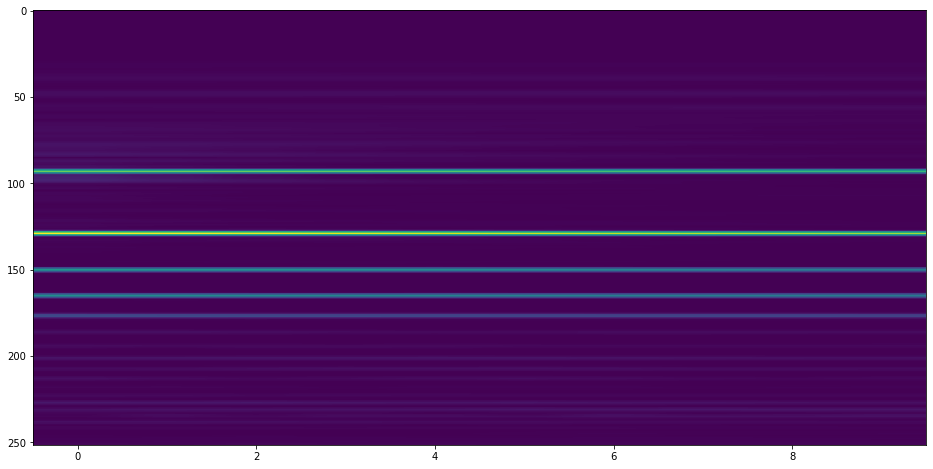

In [5]:
import matplotlib.pyplot as plt
aux,sr = librosa.core.load('Data train/MAPS_ISOL_NO_F_S0_M55_AkPnBcht.wav',sr=44100, mono=True)
X= np.abs(librosa.cqt(aux, sr=sr, hop_length=512, n_bins=252, bins_per_octave=36))
plt.figure(figsize=(16, 8))
plt.imshow(X[:,50:60], aspect="auto")

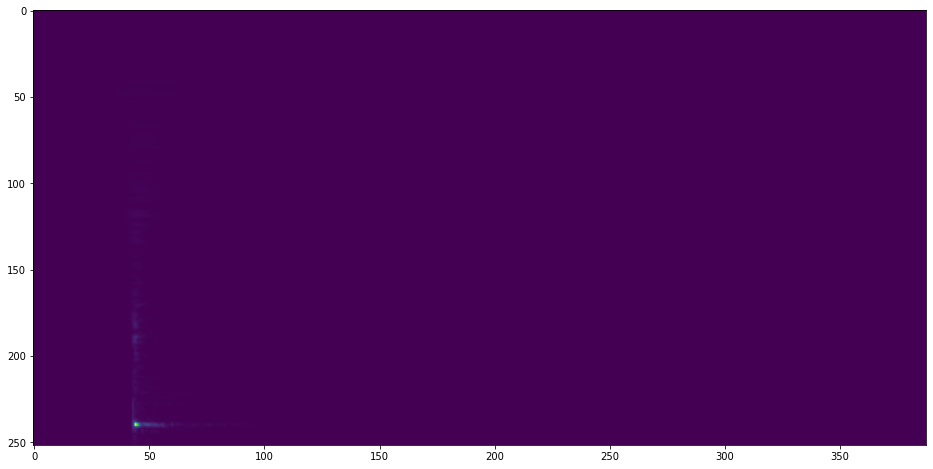

In [9]:
import matplotlib.pyplot as plt
aux,sr = librosa.core.load('Data train/'+lis[1].replace('.txt','.wav'),sr=44100, mono=True)
X= np.abs(librosa.cqt(aux, sr=sr, hop_length=512, n_bins=252, bins_per_octave=36))
plt.figure(figsize=(16, 8))
plt.imshow(X, aspect="auto")

In [2]:
l = os.listdir('Data train')

In [3]:
lis=[]
for arch in l:
    if arch.endswith('.txt'):
        lis.append(arch)

In [9]:
#Se lee el primer archivo txt
sr=44100
f=open('Data train/'+lis[0],'r') 
L=f.readlines()
f.close()
#Se guarda el segundo en donde inicia y termina la nota 
k = float(L[1].split()[0])
l = float(L[1].split()[1])
#Se guarda los freams donde se inicia y terminan
k=librosa.time_to_frames(k, sr=sr)
l=librosa.time_to_frames(l, sr=sr)
#Se genera una matriz con la longitud de las notas de un piano estandar
y=np.zeros((l-k,88))

#Se recorren las notas que se utilizaron
for j in range(1,len(L)):
  #Se guarda la posicion de la nota (respecto al piano)
  c = int(L[j].split()[2])-21
  #Se enciende la nota en la matriz
  for m in range(y.shape[0]):
    y[m][c]=1

#Se abre el archivo de audio 
aux,sr = librosa.core.load('Data train/'+lis[0].replace('.txt','.wav'),sr=sr, mono=True)
X_test = np.abs(librosa.cqt(aux, sr=sr, hop_length=512, n_bins=252, bins_per_octave=36))
X_test=X_test.T
#Se guarda el primer medio segundo
x=X_test[k:l]

In [10]:
#Se guarda todos los audios
for i in range(1,len(lis)):
    f=open('Data train/'+lis[i],'r') 
    L=f.readlines()
    f.close()
    k = float(L[1].split()[0])
    l = float(L[1].split()[1])
    k=librosa.time_to_frames(k, sr=sr)
    l=librosa.time_to_frames(l, sr=sr)
    y2 = np.zeros((l-k,88))
    for j in range(1,len(L)):
        c = int(L[j].split()[2])-21
        for m in range(y2.shape[0]):
            y2[m][c]=1
    y = np.concatenate((y,y2))
    aux,sr = librosa.core.load('Data train/'+lis[i].replace('.txt','.wav'),sr=44100, mono=True)
    X_test = np.abs(librosa.cqt(aux, sr=sr, hop_length=512, n_bins=252, bins_per_octave=36))
    X_test=X_test.T
    x2=X_test[k:l]
    x = np.concatenate((x,x2))
    if i%100 == 0:
        print(i)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700


C:\Users\Emmanuel Salazar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=831
  return f(*args, **kwargs)


1800
1900
2000


C:\Users\Emmanuel Salazar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=782
  return f(*args, **kwargs)


In [4]:
aux,sr = librosa.core.load('MAPS_MUS-mz_331_3_ENSTDkCl.wav',sr=44100, mono=True)
X_test = np.abs(librosa.cqt(aux, sr=sr, hop_length=512, n_bins=252, bins_per_octave=36))
X_test=X_test.T

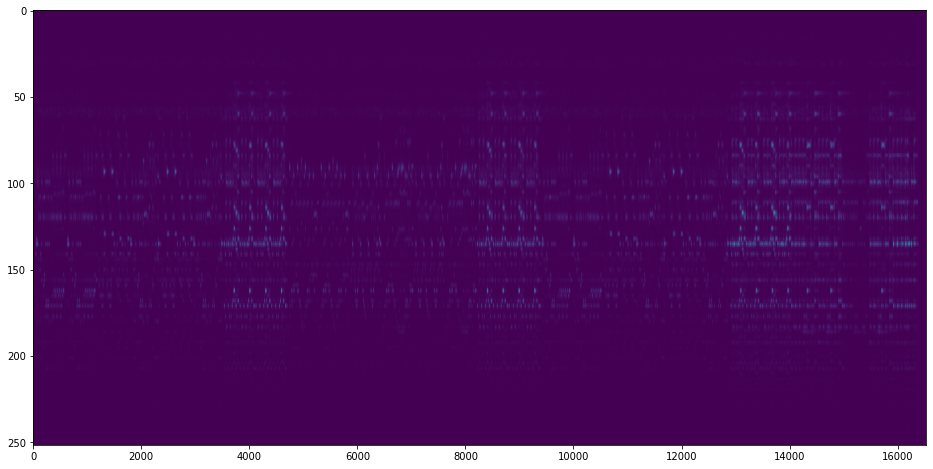

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
plt.imshow(X_test.T, aspect="auto")

In [17]:
stat = dict()
stat['mean'] =np.mean(x,axis=0)
stat['std'] = np.std(x,axis=0)

In [9]:
x = normal2(x.T)
X_test = normal2(X_test.T)

Normalizing...


In [10]:
import numpy as np
np.save('Res Base/x_value.npy', x)
np.save('Res Base/y_value.npy', y)
np.save('Res Base/X_test_value.npy', X_test)
np.save('Res Base/x_mean.npy', stat['mean'])
np.save('Res Base/x_std.npy', stat['std'])